#Importing the libraries


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import warnings
warnings.filterwarnings('ignore')


#Read the Dataset



In [2]:
snc_df = pd.read_csv(r"/content/school_and_country_table.csv")
times = pd.read_csv(r"/content/timesData.csv")
cwur = pd.read_csv(r"/content/cwurData.csv")
shan = pd.read_csv(r"/content/shanghaiData.csv")

In [3]:
snc_df.head()

,school_name,country
0,Harvard University,United States of America
1,California Institute of Technology,United States of America
2,Massachusetts Institute of Technology,United States of America
3,Stanford University,United States of America
4,Princeton University,United States of America


In [4]:
snc_df.shape

(818, 2)

In [5]:
times.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


In [6]:
times.shape

(2603, 14)

In [7]:
shan.head()

,world_rank,university_name,national_rank,total_score,alumni,award,hici,ns,pub,pcp,year
0,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,72.4,2005
1,2,University of Cambridge,1,73.6,99.8,93.4,53.3,56.6,70.9,66.9,2005
2,3,Stanford University,2,73.4,41.1,72.2,88.5,70.9,72.3,65.0,2005
3,4,"University of California, Berkeley",3,72.8,71.8,76.0,69.4,73.9,72.2,52.7,2005
4,5,Massachusetts Institute of Technology (MIT),4,70.1,74.0,80.6,66.7,65.8,64.3,53.0,2005


In [8]:
cwur = pd.read_csv(r"/content/cwurData.csv")

In [9]:
cwur.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


#Handling missing values

In [10]:
cwur.shape

(2200, 14)

In [11]:
cwur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            2200 non-null   int64  
 1   institution           2200 non-null   object 
 2   country               2200 non-null   object 
 3   national_rank         2200 non-null   int64  
 4   quality_of_education  2200 non-null   int64  
 5   alumni_employment     2200 non-null   int64  
 6   quality_of_faculty    2200 non-null   int64  
 7   publications          2200 non-null   int64  
 8   influence             2200 non-null   int64  
 9   citations             2200 non-null   int64  
 10  broad_impact          2000 non-null   float64
 11  patents               2200 non-null   int64  
 12  score                 2200 non-null   float64
 13  year                  2200 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 240.8+ KB


In [12]:
np.sum(cwur.isnull())


world_rank                0
institution               0
country                   0
national_rank             0
quality_of_education      0
alumni_employment         0
quality_of_faculty        0
publications              0
influence                 0
citations                 0
broad_impact            200
patents                   0
score                     0
year                      0
dtype: int64

In [13]:
cwur["broad_impact"].fillna(cwur["broad_impact"].median(),inplace=True)

In [14]:
np.sum(cwur.isnull())

world_rank              0
institution             0
country                 0
national_rank           0
quality_of_education    0
alumni_employment       0
quality_of_faculty      0
publications            0
influence               0
citations               0
broad_impact            0
patents                 0
score                   0
year                    0
dtype: int64

#Handling Categorical Values



In [15]:
datTypeSeries = cwur.dtypes
print("Data type of each column of timesData Dataframe :")
print(datTypeSeries)

Data type of each column of timesData Dataframe :
world_rank                int64
institution              object
country                  object
national_rank             int64
quality_of_education      int64
alumni_employment         int64
quality_of_faculty        int64
publications              int64
influence                 int64
citations                 int64
broad_impact            float64
patents                   int64
score                   float64
year                      int64
dtype: object


In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [17]:
cwur["institution"]=le.fit_transform(cwur["institution"])
cwur["country"]=le.fit_transform(cwur["country"])

In [18]:
cwur

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,184,54,1,7,9,1,1,1,1,496.0,5,100.00,2012
1,2,312,54,2,9,17,3,12,4,4,496.0,1,91.67,2012
2,3,511,54,3,17,11,5,4,2,2,496.0,15,89.50,2012
3,4,637,57,1,10,24,4,16,16,11,496.0,50,86.17,2012
4,5,53,54,4,2,29,7,37,22,22,496.0,18,85.21,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,996,954,37,7,367,567,218,926,845,812,969.0,816,44.03,2015
2196,997,11,14,4,236,566,218,997,908,645,981.0,871,44.03,2015
2197,998,132,4,18,367,549,218,830,823,812,975.0,824,44.03,2015
2198,999,576,48,40,367,567,218,886,974,812,975.0,651,44.02,2015


#Handling outliers


In [19]:
def fun(col):
  sns.boxplot(x=col,data=cwur)
  plt.show()

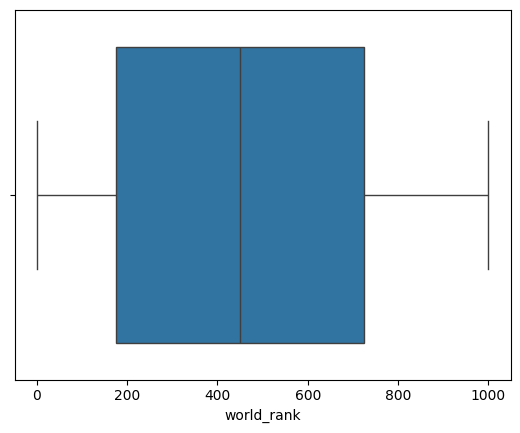

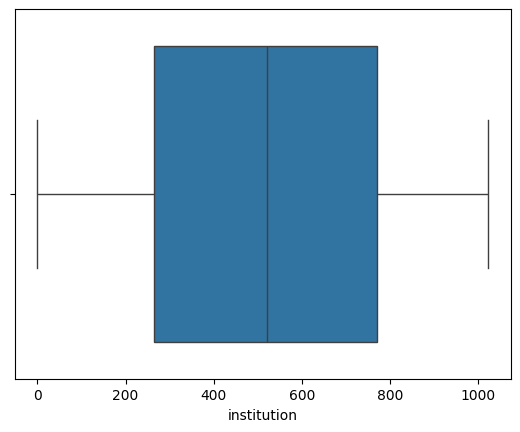

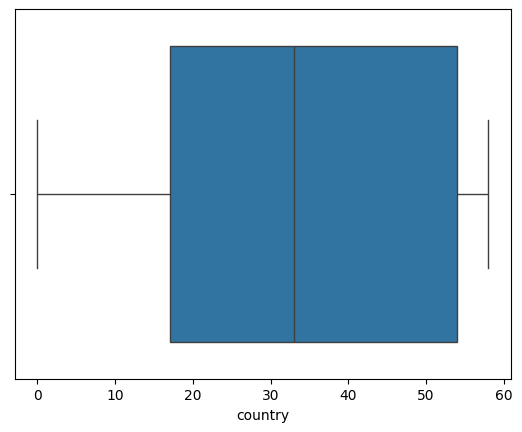

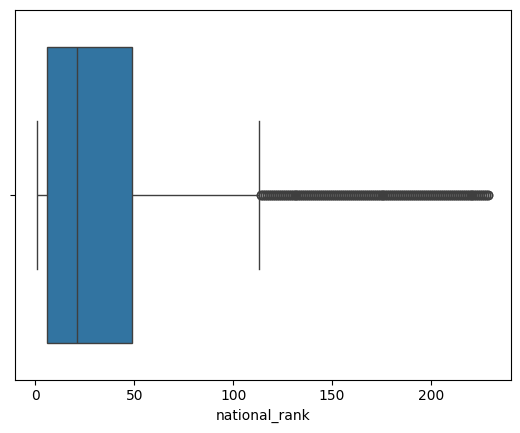

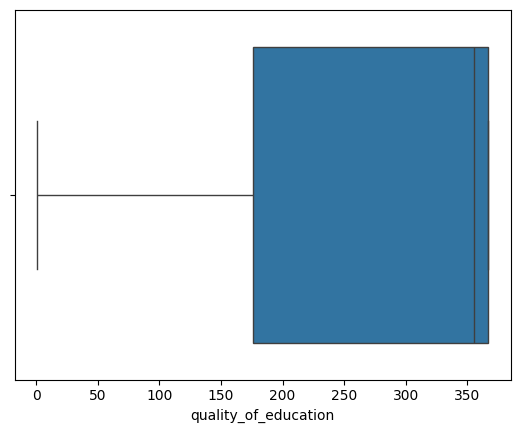

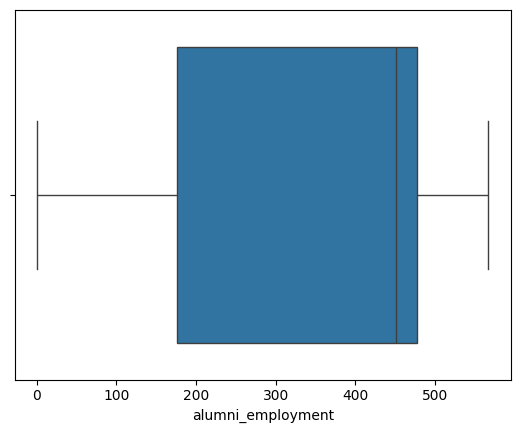

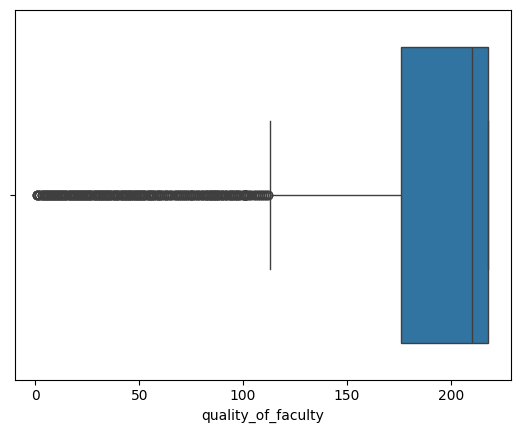

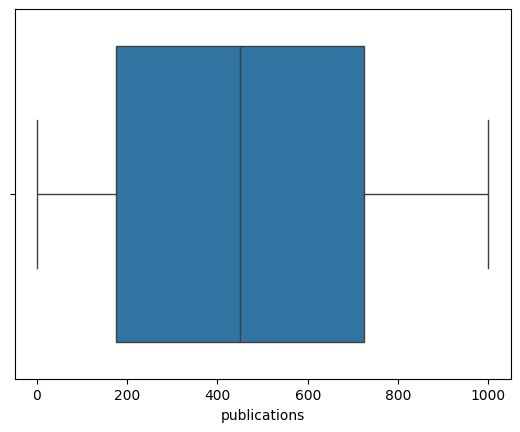

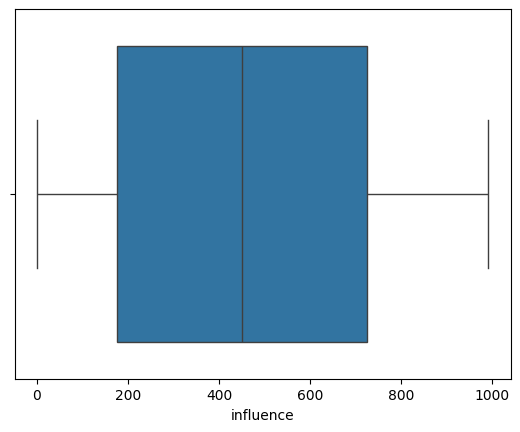

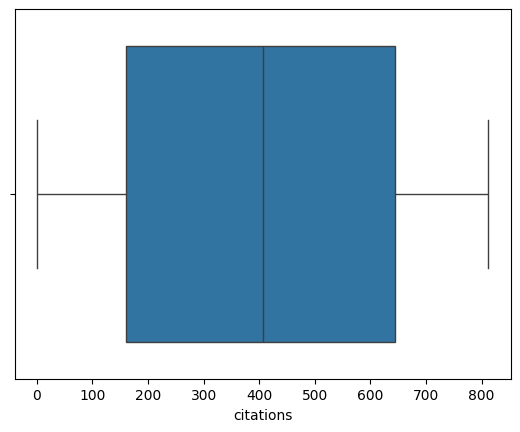

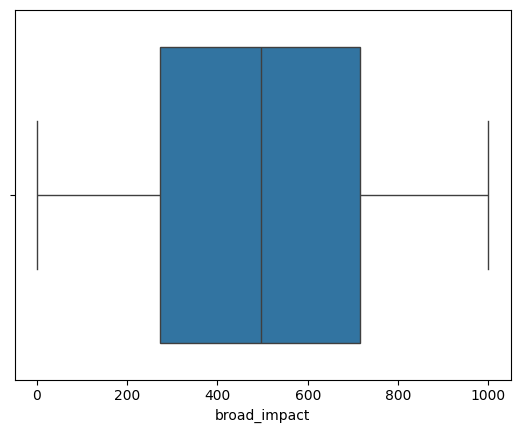

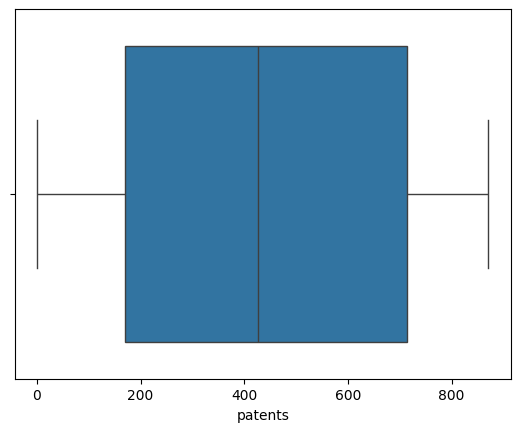

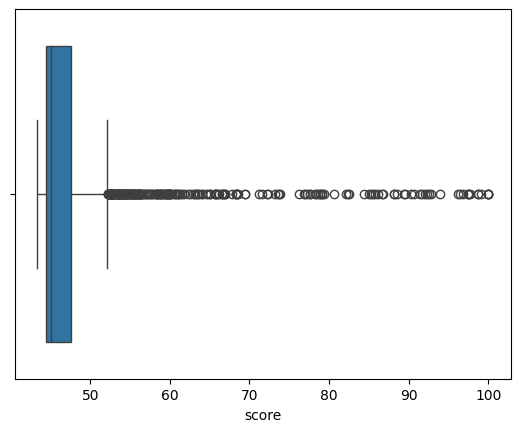

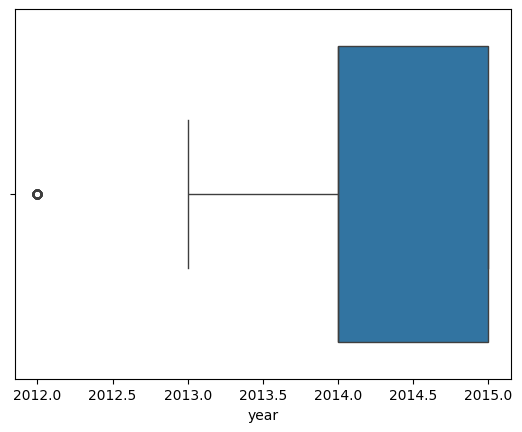

In [20]:
for i in cwur.columns:
  fun(i)

In [21]:
for column in cwur.columns:
    # Check if the column contains numeric data
    if pd.api.types.is_numeric_dtype(cwur[column]):
        # Calculate quantiles
        quant = cwur[column].quantile(q=[0.75, 0.25])
        Q3 = quant.loc[0.75]
        Q1 = quant.loc[0.25]

        # Calculate IQR
        IQR = Q3 - Q1

        # Calculate lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Replace outliers with values within the bounds
        cwur[column] = np.where(cwur[column] < lower_bound, lower_bound,cwur[column])
        cwur[column] = np.where(cwur[column] > upper_bound, upper_bound, cwur[column])


In [22]:


for column in cwur.columns:
    if pd.api.types.is_numeric_dtype(cwur[column]):
        quant = cwur[column].quantile(q=[0.75, 0.25])
        Q3 = quant.loc[0.75]
        Q1 = quant.loc[0.25]
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        cwur = cwur[(cwur[column] >= lower_bound) & (cwur[column] <= upper_bound)]



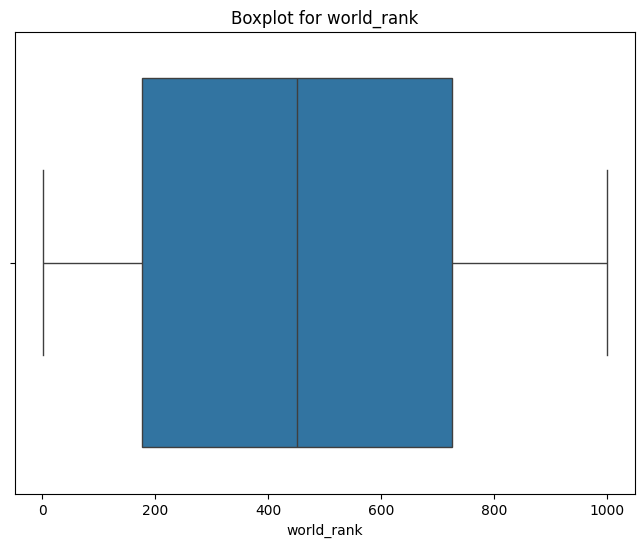

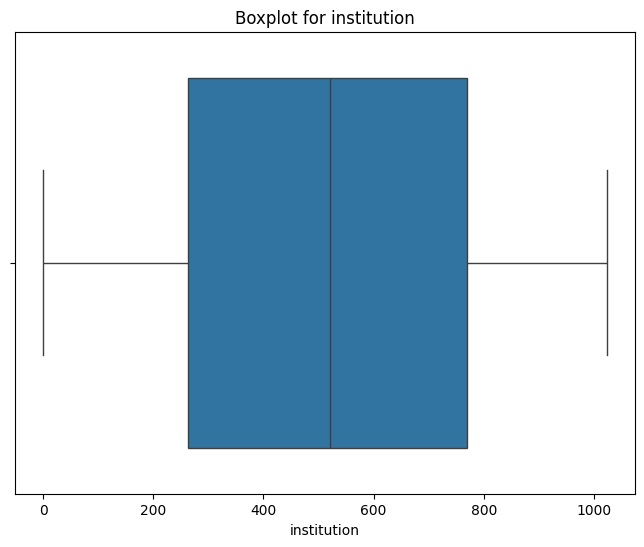

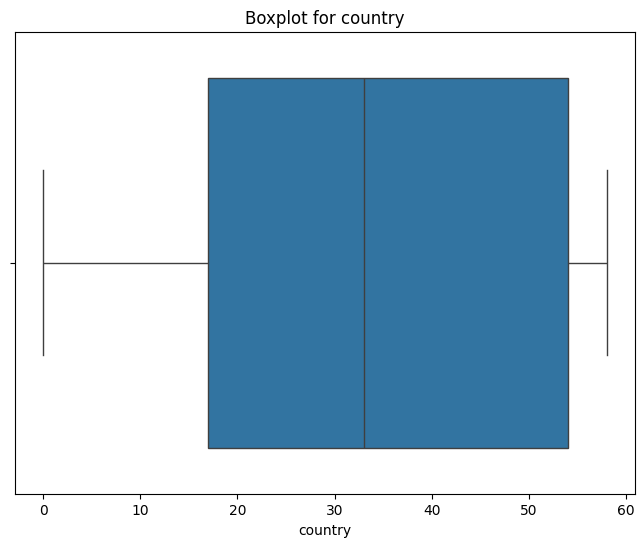

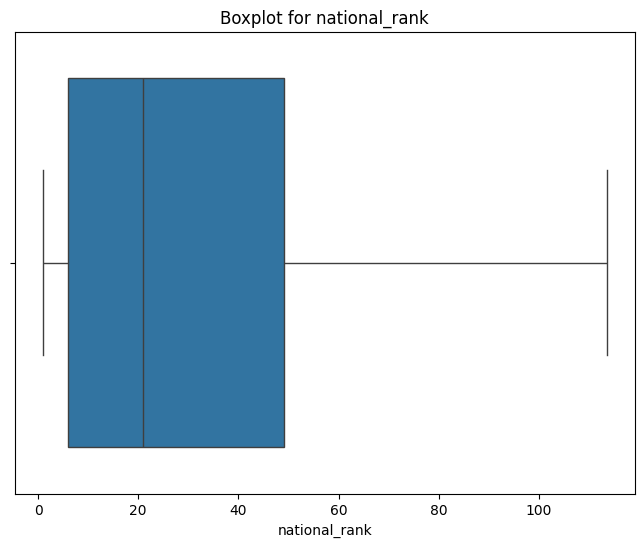

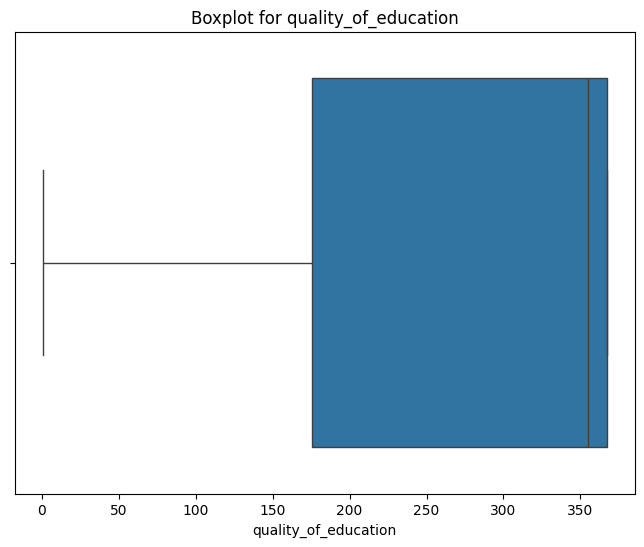

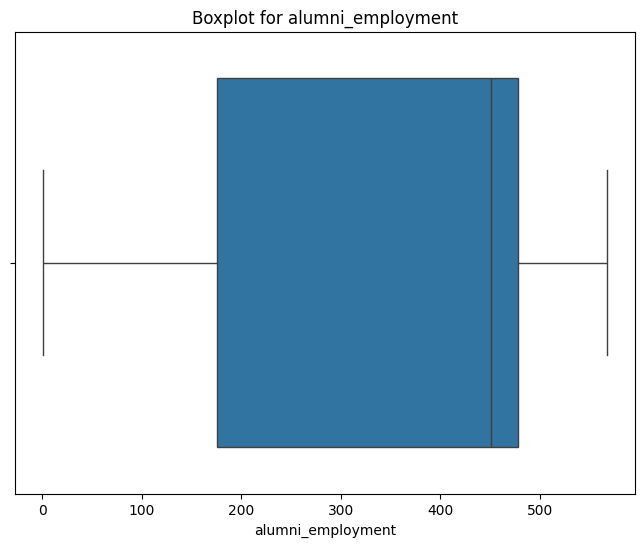

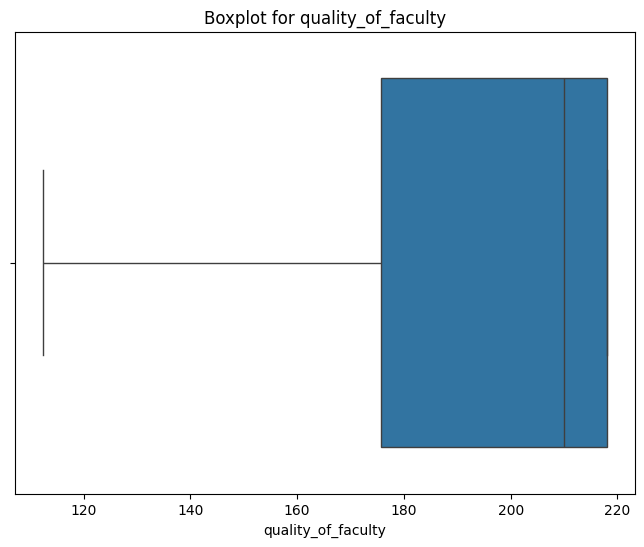

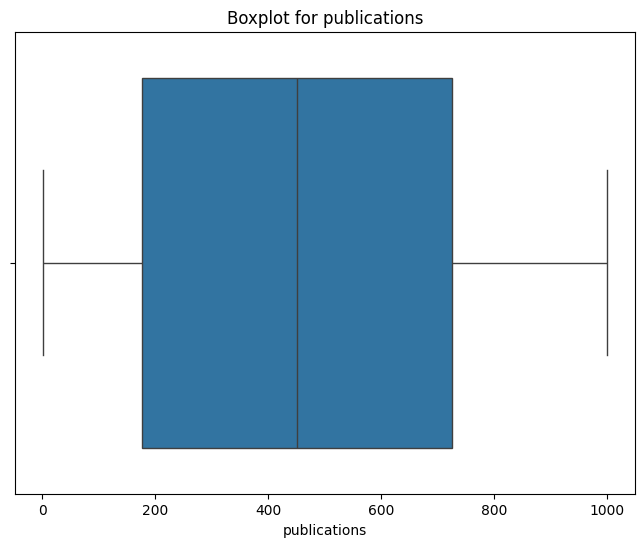

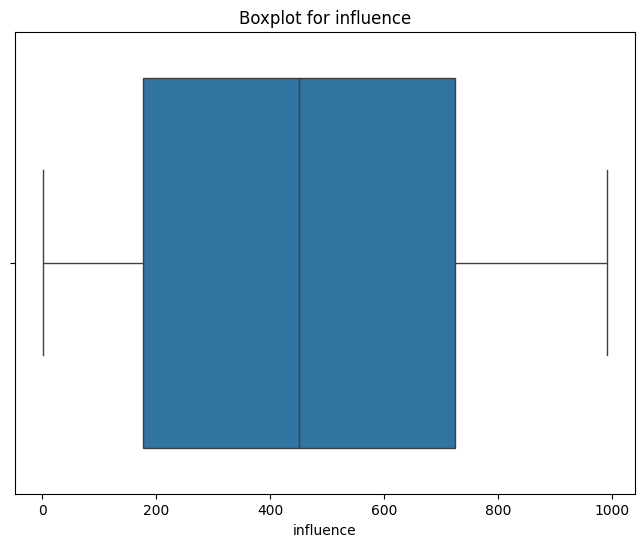

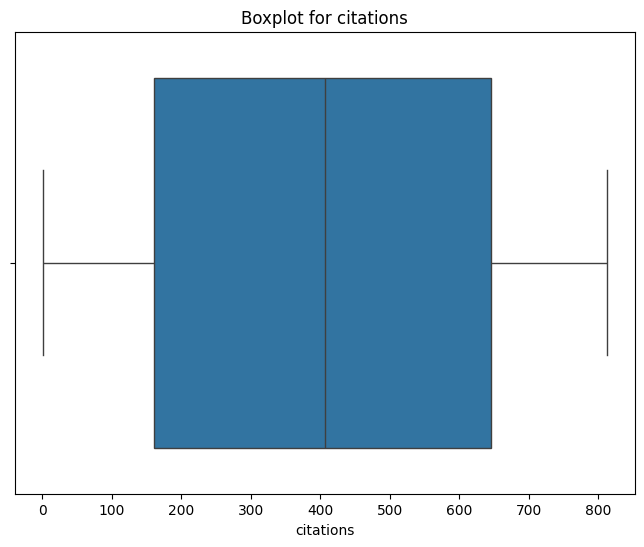

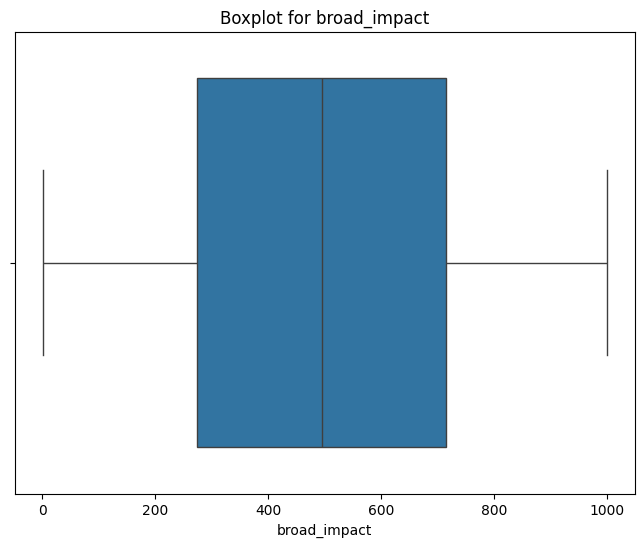

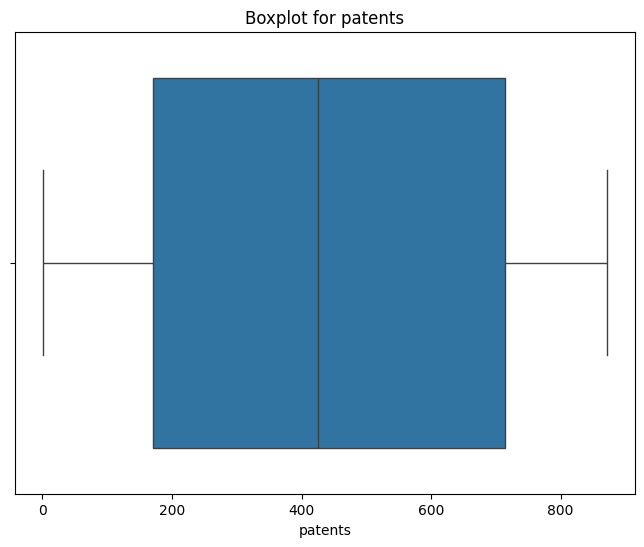

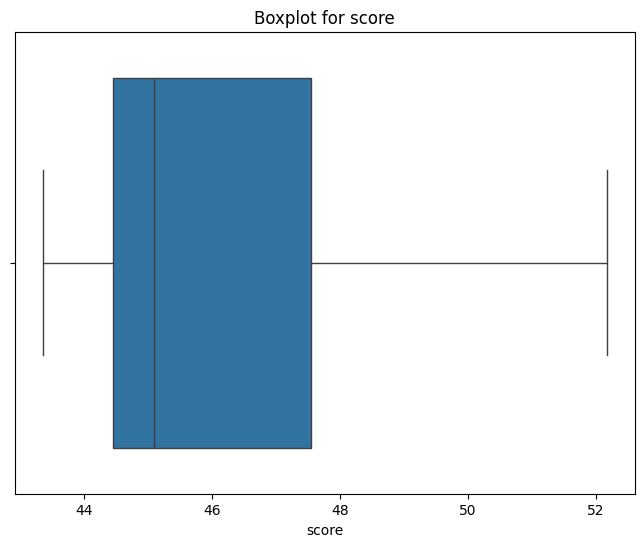

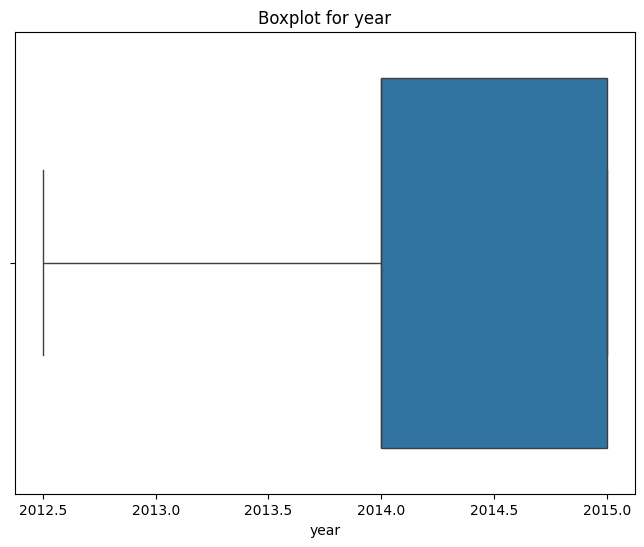

In [23]:
# Iterate over each column and plot boxplot
for column in cwur.columns:
    plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
    sns.boxplot(x=cwur[column])
    plt.title(f'Boxplot for {column}')
    plt.xlabel(column)
    plt.show()

In [24]:
cwur.shape

(2200, 14)

In [25]:
cwur.dtypes


world_rank              float64
institution             float64
country                 float64
national_rank           float64
quality_of_education    float64
alumni_employment       float64
quality_of_faculty      float64
publications            float64
influence               float64
citations               float64
broad_impact            float64
patents                 float64
score                   float64
year                    float64
dtype: object

#Descriptive Statistical

In [26]:
cwur.describe(include = "all")

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,459.590909,516.390909,34.110455,34.161818,275.100455,357.116818,189.660000,459.908636,459.797727,413.417273,496.635909,433.346364,46.396089,2014.340909
std,304.320363,294.908607,19.211020,35.642332,121.935100,186.779252,41.673073,303.760352,303.331822,264.366549,273.561106,273.996525,2.674666,0.697334
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,112.375000,1.000000,1.000000,1.000000,1.000000,1.000000,43.360000,2012.500000
25%,175.750000,263.750000,17.000000,6.000000,175.750000,175.750000,175.750000,175.750000,175.750000,161.000000,273.000000,170.750000,44.460000,2014.000000
50%,450.500000,521.000000,33.000000,21.000000,355.000000,450.500000,210.000000,450.500000,450.500000,406.000000,496.000000,426.000000,45.100000,2014.000000
75%,725.250000,770.250000,54.000000,49.000000,367.000000,478.000000,218.000000,725.000000,725.250000,645.000000,716.000000,714.250000,47.545000,2015.000000
max,1000.000000,1023.000000,58.000000,113.500000,367.000000,567.000000,218.000000,1000.000000,991.000000,812.000000,1000.000000,871.000000,52.172500,2015.000000


#Visual Analysis

Univariate Analysis

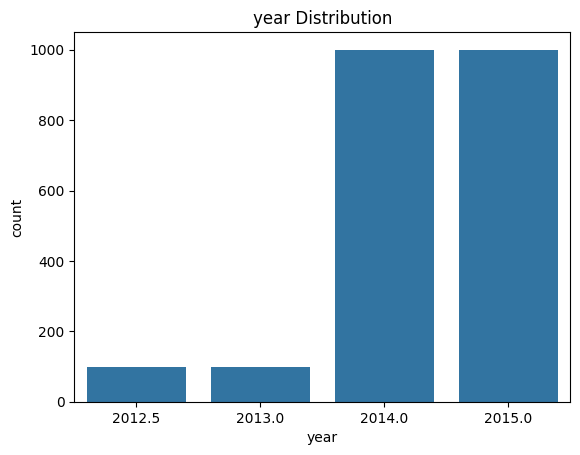

In [27]:

sns.countplot(x='year', data=cwur)
plt.title('year Distribution')
plt.show()

In [28]:


# Assuming 'cwur' is your DataFrame, create 'snc_cwur'
snc_cwur = cwur.copy() # Create a copy of the cwur DataFrame



In [29]:
# Verify the column names in your DataFrame
print(snc_cwur.columns)

# Adjust the code to use the correct column name
# Replace 'institution' with the actual name of the column containing school names
mostschools = snc_cwur.groupby('country')['institution'].count().sort_values(ascending=False).head()
print(mostschools)

Index(['world_rank', 'institution', 'country', 'national_rank',
       'quality_of_education', 'alumni_employment', 'quality_of_faculty',
       'publications', 'influence', 'citations', 'broad_impact', 'patents',
       'score', 'year'],
      dtype='object')
country
54.0    573
8.0     167
28.0    159
57.0    144
18.0    115
Name: institution, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

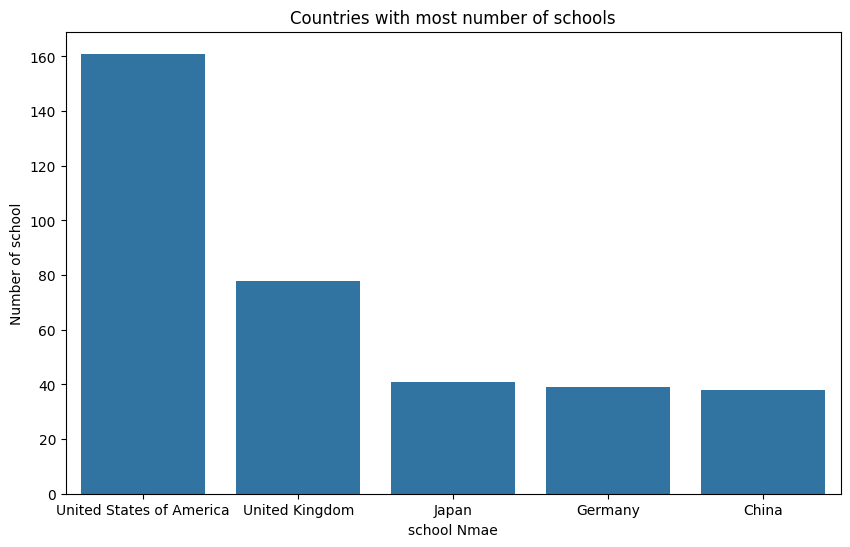

In [30]:
mostschools=snc_df.groupby('country').school_name.count().sort_values(ascending=False).head()
YPoints = np.array(mostschools)
XPoints = np.array(mostschools.index)

plt.figure(figsize = (10,6))

sns.barplot(x = XPoints, y = YPoints)
sns.set_style("darkgrid")

plt.xlabel("school Nmae")
plt.ylabel("Number of school")
plt.title("Countries with most number of schools")
plt.show

# **Bivariate** **Analysis**




In [31]:
Top10=cwur.head(10)

Index(['world_rank', 'institution', 'country', 'national_rank',
       'quality_of_education', 'alumni_employment', 'quality_of_faculty',
       'publications', 'influence', 'citations', 'broad_impact', 'patents',
       'score', 'year'],
      dtype='object')


[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6'),
 Text(7, 0, '7'),
 Text(8, 0, '8'),
 Text(9, 0, '9')]

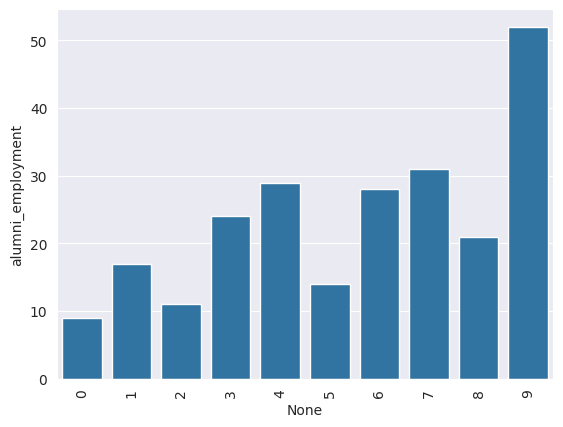

In [32]:
# Verify the column names in the Top10 DataFrame
print(Top10.columns)

# If 'alumn_employment' is not present, correct the column name
# For example, if the correct column name is 'alumni_employment', use:
sns.barplot(x=Top10.index, y='alumni_employment', data=Top10).set_xticklabels(labels=Top10.index, rotation=90)

# If you intended to use a different DataFrame, replace 'Top10' accordingly

# **Multivariate** **Analysis**

<function matplotlib.pyplot.show(close=None, block=None)>

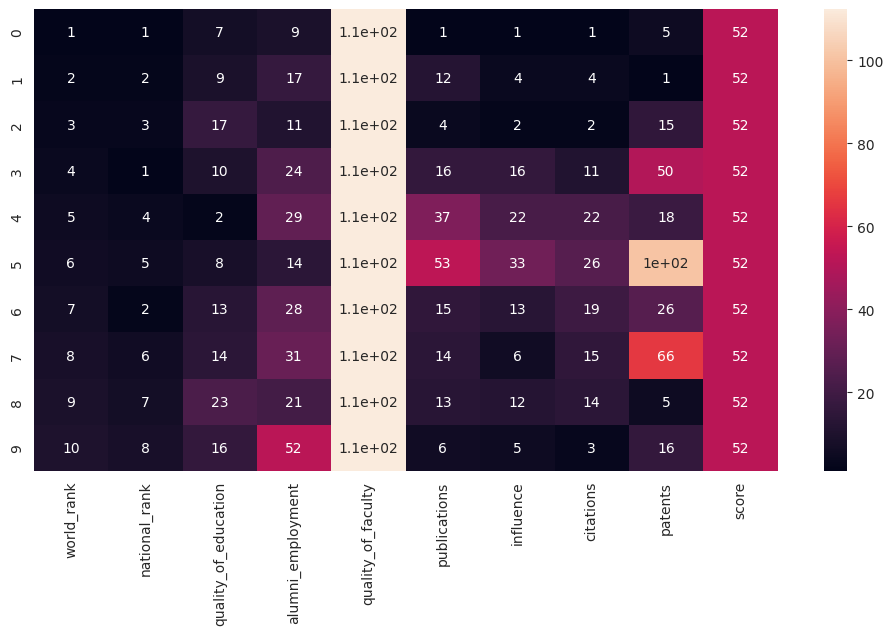

In [33]:
topi = cwur.head(10)
#topi.info()
topi_f = topi.loc[:,['world_rank','national_rank','quality_of_education','alumni_employment','quality_of_faculty','publications','influence','citations','patents','score']]
plt.figure(figsize = (12,6))
sns.heatmap(data = topi_f,annot = True)
plt.show

# **Splitting** **data** **into** **train** **and** **test**

In [34]:
x = cwur.iloc[:, : -1]
y = cwur.iloc[:, -1 :]

In [35]:
print(x)

      world_rank  institution  country  national_rank  quality_of_education  \
0            1.0        184.0     54.0            1.0                   7.0   
1            2.0        312.0     54.0            2.0                   9.0   
2            3.0        511.0     54.0            3.0                  17.0   
3            4.0        637.0     57.0            1.0                  10.0   
4            5.0         53.0     54.0            4.0                   2.0   
...          ...          ...      ...            ...                   ...   
2195       996.0        954.0     37.0            7.0                 367.0   
2196       997.0         11.0     14.0            4.0                 236.0   
2197       998.0        132.0      4.0           18.0                 367.0   
2198       999.0        576.0     48.0           40.0                 367.0   
2199      1000.0         74.0      8.0           83.0                 367.0   

      alumni_employment  quality_of_faculty  public

In [36]:
print(y)

        year
0     2012.5
1     2012.5
2     2012.5
3     2012.5
4     2012.5
...      ...
2195  2015.0
2196  2015.0
2197  2015.0
2198  2015.0
2199  2015.0

[2200 rows x 1 columns]


In [37]:
x.shape

(2200, 13)

In [38]:
y.shape

(2200, 1)

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8 , random_state=42)

# **Training** **The** **Model** **In** **Multiple** **Algorithms**

Linear Regression model

In [40]:
linReg = LinearRegression()
linReg.fit(x_train,y_train)


LinearRegression()

In [41]:
y_pred = linReg.predict(x_test)

In [42]:
accuracy = linReg.score(x_test,y_test)
print(accuracy)

0.4508526715460146


Lasso Regression model

In [43]:
lassoReg = linear_model.Lasso(alpha = 0.1)
lassoReg.fit(x,y)

Lasso(alpha=0.1)

In [44]:
y_pred = lassoReg.predict(x_test)

In [45]:
accuracy = lassoReg.score(x_test,y_test)
print(accuracy)

0.4593203827950125


SVM Model

In [46]:
svr = SVR().fit(x,y)


In [47]:

y_pred = svr.predict(x_test)


In [48]:
accuracy = svr.score(x_test,y_test)
print(accuracy)

0.6385359614427681


Decision Tree Model:

In [49]:
dt = DecisionTreeRegressor(random_state = 0)
dt.fit(x,y)


DecisionTreeRegressor(random_state=0)

In [50]:
y_pred = dt.predict(x_test)

In [51]:
accuracy = dt.score(x_test,y_test)
print(accuracy)

1.0


Random Forest Model:

In [52]:
rf = RandomForestRegressor(n_estimators = 100 , random_state = 0)
rf.fit(x,y)


RandomForestRegressor(random_state=0)

In [53]:
y_pred = rf.predict(x_test)

In [54]:
accuracy = rf.score(x_test,y_test)
print(accuracy)

0.9831868897420681


# **Testing The Model**

In [55]:
# Assuming 'x_test' has the correct number of features (13) and is available in the environment.
# Replace this with the actual data you want to predict on if it's different.
# y_pred = rf.predict([[7,9,1,1,1,1,5]])  # Predict on the first row of x_test as an example
# The above line is incorrect as it passes an array with only 7 features.

# Select the first row of x_test to predict on. This assumes x_test is a pandas DataFrame.
y_pred = rf.predict(x_test.iloc[[0]])  # Predict on the first row of x_test

# If x_test is a NumPy array, use the following:
# y_pred = rf.predict(x_test[[0]])  # Predict on the first row of x_test

In [56]:
print(y_pred)

[2015.]


# **Testing Model With Multiple Evaluation Metrics**

Compare the Model

In [57]:
# Assuming 'x_test' is available in the environment and is a pandas DataFrame or a NumPy array.
y_pred = linReg.predict(x_test)  # Predict on the entire x_test dataset

print("Prediction Evaluation using Linear Regression")
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared:', r2_score(y_test, y_pred))

Prediction Evaluation using Linear Regression
Mean Absolute Error: 0.46221705872422064
Mean Squared Error: 0.2624610796230122
Root Mean Squared Error: 0.5123095544912394
R-squared: 0.4508526715460146


In [58]:

y_pred = lassoReg.predict(x_test)
print("Prediction Evaluation using lasso Regression")
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared:', r2_score(y_test, y_pred))

Prediction Evaluation using lasso Regression
Mean Absolute Error: 0.4560590191031622
Mean Squared Error: 0.25841399695285744
Root Mean Squared Error: 0.5083443684677321
R-squared: 0.4593203827950125


In [59]:
y_pred = dt.predict(x_test)

print("Prediction Evaluation using Decision Regression")
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared:', r2_score(y_test, y_pred))

Prediction Evaluation using Decision Regression
Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
R-squared: 1.0


In [60]:
y_pred = rf.predict(x_test)
print("Prediction Evaluation using Random Regression")
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared:', r2_score(y_test, y_pred))

Prediction Evaluation using Random Regression
Mean Absolute Error: 0.03937121212121197
Mean Squared Error: 0.008035707070706964
Root Mean Squared Error: 0.08964210545668237
R-squared: 0.9831868897420681


In [61]:
import pickle
pickle.dump(dt,open('usp.pkl','wb'))

# **Integrate With Web Framework**

Build python code